In [43]:
import numpy as np
import trimesh
import networkx as nx
import scipy
import matplotlib.pyplot as plt

### Spectral Embedding

In [23]:
# gr : nx Graph
# k : k-largest eigenvalues

# returns ndarray with shape N x k
# for N = number of nodes in gr 
#     k = number of eigenvalues 
def laplacian_eigenmap(gr, k):
    lap = nx.laplacian_matrix(gr)
    lap = lap.asfptype()
    eigs = scipy.sparse.linalg.eigs(lap, k=k)
    e_vals = eigs[0]
    e_vecs = eigs[1]
    
    # N = len(gr.nodes)
    # spec_emb = np.zeros((N, k))
    # for i in range(N):
    #     spec_emb[i] = e_vecs[]
    
    return e_vals, e_vecs

### Data

In [140]:
golfball_2 = trimesh.load('/Users/maxperozek/GINR-texture/Golf_Ball_1640986/files/golf-ball.STL')

In [141]:
graph = nx.Graph()

In [142]:
graph.is_directed()

False

In [143]:
# *** presumably this means that each face triange becomes a node, and polygon adjacency defines the graph structure, rather than vertex adjacency
# Is this right?? ^^
graph.add_edges_from(golfball_2.face_adjacency)

In [27]:
graph = nx.karate_club_graph()

In [28]:
len(graph.nodes)

34

In [9]:
lap = nx.laplacian_matrix(graph)
lap = lap.asfptype()
eigs = scipy.sparse.linalg.eigs(lap, k=10)

<class 'networkx.utils.decorators.argmap'> compilation 4:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


In [10]:
# k=100 eigenvalues:
print(eigs[0].shape)
eigs[0]

(10,)


array([52.06534104+0.j, 45.99076814+0.j, 41.8328632 +0.j, 37.99275584+0.j,
       29.68838404+0.j, 25.55550393+0.j, 22.78496303+0.j, 21.35865043+0.j,
       19.32382398+0.j, 17.03379508+0.j])

In [11]:
# n x k=100 matrix of eigenvalues
print(eigs[1].shape)

(34, 10)


In [12]:
# this should be the eigenvector corresponding to eigenvalue 0
eigs[1][:,0]

array([-4.11229204e-02+0.j, -2.13938999e-03+0.j, -6.95734090e-02+0.j,
        1.10525222e-03+0.j,  2.57515842e-03+0.j,  2.79680395e-03+0.j,
        2.69567635e-03+0.j,  9.36331977e-03+0.j,  9.65460354e-02+0.j,
        3.97500408e-02+0.j,  1.50072488e-03+0.j,  2.51437692e-03+0.j,
        7.86578498e-04+0.j,  9.01355566e-02+0.j,  2.57268009e-02+0.j,
        6.86029770e-02+0.j, -3.57697144e-04+0.j,  1.71985416e-03+0.j,
        3.37807527e-02+0.j,  2.18188703e-02+0.j,  5.62677184e-03+0.j,
        1.80014578e-03+0.j,  5.04519951e-02+0.j,  7.61827290e-02+0.j,
       -9.34957338e-03+0.j, -2.77751892e-02+0.j,  3.94925306e-02+0.j,
        9.27680733e-02+0.j,  3.95380736e-02+0.j,  1.53847524e-02+0.j,
        4.54365953e-02+0.j,  9.92939356e-02+0.j,  2.23311747e-01+0.j,
       -9.40387950e-01+0.j])

In [16]:
eig_test = lap.dot(eigs[1][:,0])

In [17]:
eig_test.shape

(34,)

In [18]:
eig_test == eigs[1][:,0] * eigs[0][0]

array([False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False])

In [19]:
eig_test

array([-2.14107888e+00+0.j, -1.11388069e-01+0.j, -3.62236327e+00+0.j,
        5.75453337e-02+0.j,  1.34076501e-01+0.j,  1.45616552e-01+0.j,
        1.40351309e-01+0.j,  4.87504437e-01+0.j,  5.02670226e+00+0.j,
        2.06959943e+00+0.j,  7.81357528e-02+0.j,  1.30911892e-01+0.j,
        4.09534778e-02+0.j,  4.69293849e+00+0.j,  1.33947466e+00+0.j,
        3.57183740e+00+0.j, -1.86236238e-02+0.j,  8.95447933e-02+0.j,
        1.75880641e+00+0.j,  1.13600692e+00+0.j,  2.92959795e-01+0.j,
        9.37252040e-02+0.j,  2.62680033e+00+0.j,  3.96647977e+00+0.j,
       -4.86788727e-01+0.j, -1.44612470e+00+0.j,  2.05619207e+00+0.j,
        4.83000137e+00+0.j,  2.05856329e+00+0.j,  8.01012382e-01+0.j,
        2.36567183e+00+0.j,  5.16977262e+00+0.j,  1.16268023e+01+0.j,
       -4.89616193e+01+0.j])

In [20]:
eigs[1][:,0] * eigs[0][0]

array([-2.14107888e+00+0.j, -1.11388069e-01+0.j, -3.62236327e+00+0.j,
        5.75453337e-02+0.j,  1.34076501e-01+0.j,  1.45616552e-01+0.j,
        1.40351309e-01+0.j,  4.87504437e-01+0.j,  5.02670226e+00+0.j,
        2.06959943e+00+0.j,  7.81357528e-02+0.j,  1.30911892e-01+0.j,
        4.09534778e-02+0.j,  4.69293849e+00+0.j,  1.33947466e+00+0.j,
        3.57183740e+00+0.j, -1.86236238e-02+0.j,  8.95447933e-02+0.j,
        1.75880641e+00+0.j,  1.13600692e+00+0.j,  2.92959795e-01+0.j,
        9.37252040e-02+0.j,  2.62680033e+00+0.j,  3.96647977e+00+0.j,
       -4.86788727e-01+0.j, -1.44612470e+00+0.j,  2.05619207e+00+0.j,
        4.83000137e+00+0.j,  2.05856329e+00+0.j,  8.01012382e-01+0.j,
        2.36567183e+00+0.j,  5.16977262e+00+0.j,  1.16268023e+01+0.j,
       -4.89616193e+01+0.j])

In [ ]:
# This looks to be correct. I think == line above just failed due to weird float comparison stuff.

## Run prepro

In [137]:
gr = nx.karate_club_graph()
lap = nx.laplacian_matrix(gr)

<class 'networkx.utils.decorators.argmap'> compilation 4:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


In [139]:
lap.todense()

matrix([[42, -4, -5, ..., -2,  0,  0],
        [-4, 29, -6, ...,  0,  0,  0],
        [-5, -6, 33, ...,  0, -2,  0],
        ...,
        [-2,  0,  0, ..., 21, -4, -4],
        [ 0,  0, -2, ..., -4, 38, -5],
        [ 0,  0,  0, ..., -4, -5, 48]])

In [144]:
eig_vals, eig_vecs = laplacian_eigenmap(graph, 100)

In [145]:
eig_vecs.shape

(36686, 100)

In [146]:
eig_vecs

array([[-1.56549737e-07+0.j, -4.75102988e-03+0.j,  8.49128599e-03+0.j,
        ..., -4.23546040e-08+0.j,  6.37533309e-14+0.j,
         5.93740676e-15+0.j],
       [ 8.99160293e-08+0.j,  2.72880473e-03+0.j, -5.76749486e-03+0.j,
        ...,  3.93787467e-08+0.j, -4.07747822e-14+0.j,
        -4.64956599e-15+0.j],
       [ 2.51206687e-07+0.j,  7.62372010e-03+0.j, -3.50397916e-03+0.j,
        ...,  1.56740234e-08+0.j, -9.56107365e-14+0.j,
        -7.01455055e-15+0.j],
       ...,
       [ 1.18036666e-13+0.j,  6.82699096e-16+0.j, -1.14022218e-16+0.j,
        ..., -2.72417571e-14+0.j,  1.46361454e-15+0.j,
         2.91156499e-15+0.j],
       [-2.69233392e-13+0.j,  3.44238969e-15+0.j, -1.20335252e-15+0.j,
        ...,  9.69947901e-14+0.j, -1.22163297e-13+0.j,
        -2.01725663e-14+0.j],
       [ 6.25221810e-14+0.j, -1.94929855e-15+0.j,  6.73378523e-16+0.j,
        ...,  1.59455176e-14+0.j,  3.82516197e-15+0.j,
        -9.04331074e-16+0.j]])

In [147]:
val_map = {i : float(eig_vecs[i,9]) for i in range(eig_vecs.shape[0])}

/var/folders/ms/mpc19fxd7zz_dr0tr65kskdh0000gn/T/ipykernel_42663/2773654024.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  val_map = {i : float(eig_vecs[i,9]) for i in range(eig_vecs.shape[0])}


In [148]:
values = [val_map.get(node) for node in graph.nodes()]

In [149]:
import matplotlib as mpl
norm = mpl.colors.Normalize(vmin=min(values), vmax=max(values))
norm(0)

0.49999777400645445

In [150]:
values = norm(values)

KeyboardInterrupt: 

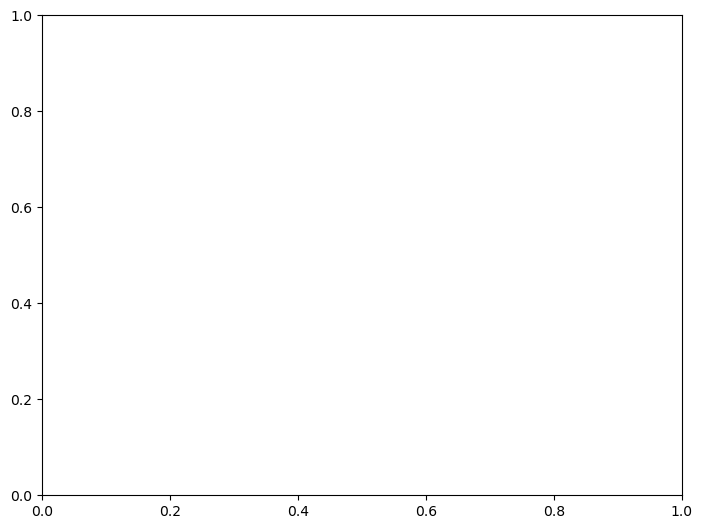

In [151]:
nx.draw(graph, cmap=plt.get_cmap('seismic'), node_color=values, with_labels=True, font_color='white')